# <center> <h1>  👨‍💻 

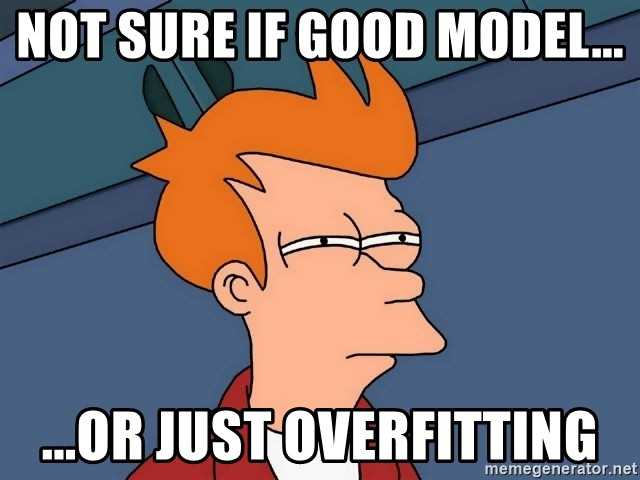

# <center> Regulirization 


Regularization - regularization, machine learning, inverse problem theory - is a method of adding additional constraints to a condition to solve an ill-posed problem or to prevent overfitting. This information often comes at a penalty for model complexity. For example, it can be limiting the smoothness of the generated function or limiting the norm of the vector field.

* Regularization via L1-regularization (lasso regression) or Manhattan distance:
    
    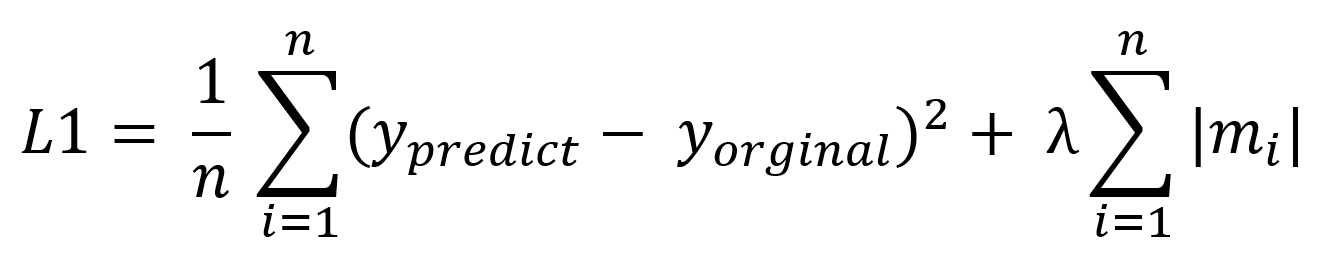

* L2 - regularization or Tikhonov regularization (ridge regression or Tikhonov regularization), allows to maintain a balance between data consistency and small solution norm for integral equations

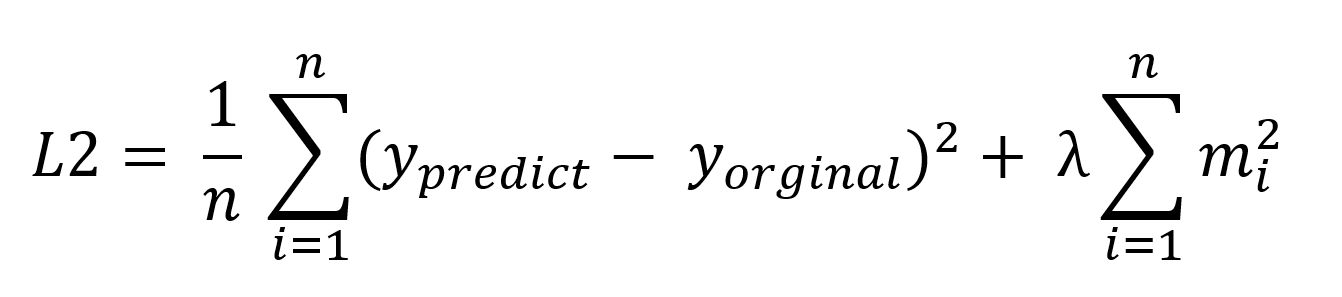

L1 - It is based on adding a penalty equal to the absolute (module) value of the sample coefficients.

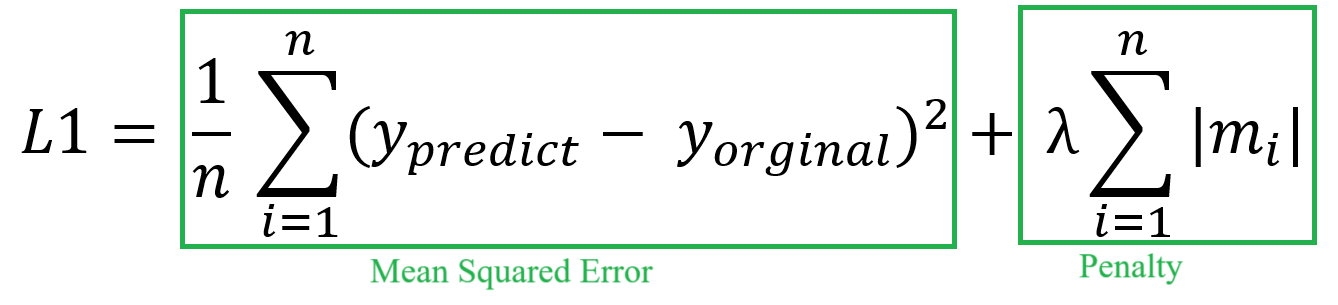

L1 regulation tends to select for the symptom because it can reduce symptom severity to zero. This allows removing symptoms from the model that do not have the required information, which in turn can reduce the complexity of the model and improve its generalizability.

L2 regularization also adds a penalty function to the model optimization function:

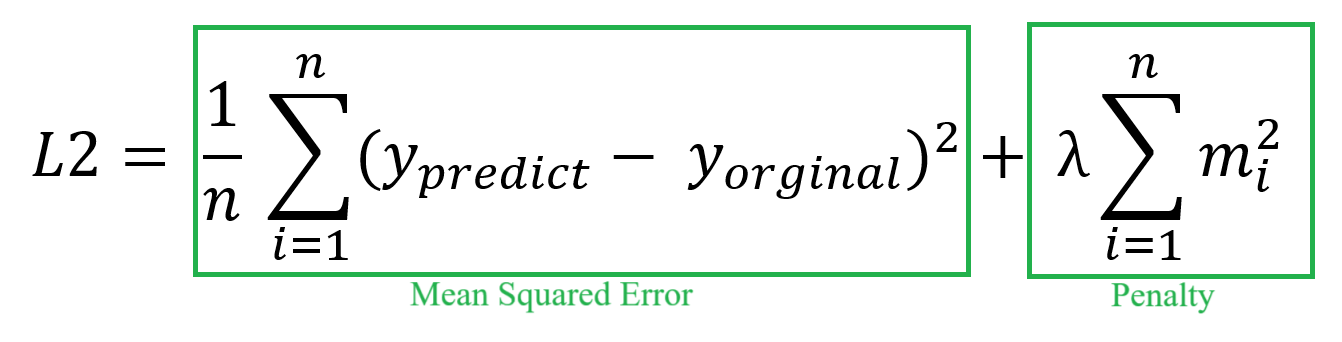

This penalty function multiplies the root mean square error by its hyperparameter. This means that the L2 regularization penalizes large values of the weights and forces them to approach zero, but unlike the L1 regularization, it does not cancel them out completely. Instead, L2 regularization penalizes large weights more smoothly and consistently, allowing you to more confidently manage the balance between model accuracy and complexity.

`So, if our model falls into overfitting, for example, the accuracy level in training is 97%, and the accuracy in testing is, for example, 80%, that is, if the difference between the accuracy in training and the accuracy in testing is large, we can correct it using regularization. `

Now let's try it in practice and see the result

In [1]:
import tensorflow as tf
from keras.utils import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

### Let's read the birds dataset

In [2]:
train_data_dir = "Datasets/birds/train"
test_data_dir = "Datasets/birds/test"

In [3]:
train_data = image_dataset_from_directory(train_data_dir, image_size=(224,224))


Found 1582 files belonging to 10 classes.


In [4]:
test_data = image_dataset_from_directory(test_data_dir, image_size=(224,224))


Found 50 files belonging to 10 classes.


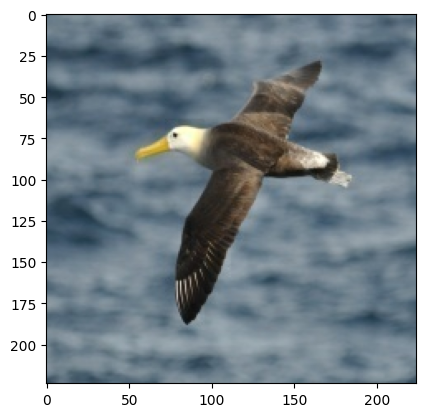

In [6]:
plt.imshow(list(train_data)[0][0][0].numpy().astype("uint8"))

In [7]:
classes = train_data.class_names
classes

['ABBOTTS BABBLER',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALEXANDRINE PARAKEET',
 'AMERICAN AVOCET',
 'AMERICAN COOT']

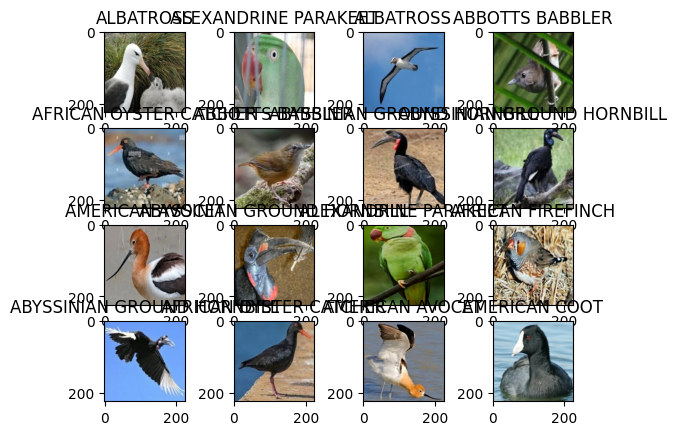

In [8]:
for image, label in train_data.take(1):
    
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.title(classes[label[i]])
        plt.imshow(image[i].numpy().astype("uint8"))
    

# Without Regulirization

In [5]:
# we will create a model without regularization
model_without_regulirization = Sequential([
    InputLayer((224,224,3)),
    
    Conv2D(8, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #112x112x8
    
    Conv2D(16, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #56x56x16
    
    Conv2D(32, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #28x82x32
    
    Conv2D(48, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #14x14x48
    
    Conv2D(64, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #7x7x64
    
    Flatten(),
    
    Dense(1000, activation="relu"),
    
    Dense(100, activation="relu"),
    
    Dense(100, activation="relu"),
    
    Dense(10, activation="softmax")
    
])

In [6]:
model_without_regulirization.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 32)       0

In [7]:
model_without_regulirization.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")


In [8]:
model_without_regulirization.fit(train_data, epochs=10)

Epoch 1/10
50/50 [==============================] - 7s 60ms/step - loss: 4.0171 - accuracy: 0.2604
Epoch 2/10
50/50 [==============================] - 3s 52ms/step - loss: 1.3826 - accuracy: 0.5215
Epoch 3/10
50/50 [==============================] - 3s 51ms/step - loss: 0.9928 - accuracy: 0.6732
Epoch 4/10
50/50 [==============================] - 3s 51ms/step - loss: 0.6987 - accuracy: 0.7649
Epoch 5/10
50/50 [==============================] - 3s 50ms/step - loss: 0.5288 - accuracy: 0.8205
Epoch 6/10
50/50 [==============================] - 3s 49ms/step - loss: 0.4528 - accuracy: 0.8426
Epoch 7/10
50/50 [==============================] - 3s 49ms/step - loss: 0.3093 - accuracy: 0.8913
Epoch 8/10
50/50 [==============================] - 3s 49ms/step - loss: 0.2162 - accuracy: 0.9248
Epoch 9/10
50/50 [==============================] - 3s 50ms/step - loss: 0.2090 - accuracy: 0.9305
Epoch 10/10
50/50 [==============================] - 3s 49ms/step - loss: 0.2020 - accuracy: 0.9298


In [9]:
model_without_regulirization.evaluate(test_data)

2/2 [==============================] - 1s 256ms/step - loss: 0.6456 - accuracy: 0.8200


[0.6455837488174438, 0.8199999928474426]

### So, without regularization, our model shows 92% accuracy in training and 81% accuracy in testing. `The difference is 11%`

# With Regulirization L1(Lasso)

In [10]:
# Let's create a model with L1 regularization
model_without_regulirization_l1 = Sequential([
    InputLayer((224,224,3)),
    
    Conv2D(8, (3,3), padding="same", activation="relu", kernel_regularizer=regularizers.L1(), bias_regularizer=regularizers.L1()),
    MaxPool2D(2,2),  #112x112x8
    
    Conv2D(16, (3,3), padding="same", activation="relu", kernel_regularizer=regularizers.L1(), bias_regularizer=regularizers.L1()),
    MaxPool2D(2,2),  #56x56x16
    
    Conv2D(32, (3,3), padding="same", activation="relu", kernel_regularizer=regularizers.L1(), bias_regularizer=regularizers.L1()),
    MaxPool2D(2,2),  #28x82x32
    
    Conv2D(48, (3,3), padding="same", activation="relu", kernel_regularizer=regularizers.L1(), bias_regularizer=regularizers.L1()),
    MaxPool2D(2,2),  #14x14x48
    
    Conv2D(64, (3,3), padding="same", activation="relu", kernel_regularizer=regularizers.L1(), bias_regularizer=regularizers.L1()),
    MaxPool2D(2,2),  #7x7x64
    
    Flatten(),
    
    Dense(1000, activation="relu"),
    
    Dense(100, activation="relu"),
    
    Dense(100, activation="relu"),
    
    Dense(10, activation="softmax")
    
])


In [11]:
model_without_regulirization_l1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 8)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 28, 28, 32)      

In [12]:
model_without_regulirization_l1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")


In [13]:
model_without_regulirization_l1.fit(train_data, epochs=10)

Epoch 1/10
50/50 [==============================] - 4s 54ms/step - loss: 19.9544 - accuracy: 0.1972
Epoch 2/10
50/50 [==============================] - 3s 50ms/step - loss: 12.1046 - accuracy: 0.4102
Epoch 3/10
50/50 [==============================] - 3s 52ms/step - loss: 8.2445 - accuracy: 0.5190
Epoch 4/10
50/50 [==============================] - 3s 50ms/step - loss: 5.9955 - accuracy: 0.6239
Epoch 5/10
50/50 [==============================] - 3s 53ms/step - loss: 4.6360 - accuracy: 0.6896
Epoch 6/10
50/50 [==============================] - 3s 49ms/step - loss: 3.5180 - accuracy: 0.7743
Epoch 7/10
50/50 [==============================] - 3s 51ms/step - loss: 2.9186 - accuracy: 0.7977
Epoch 8/10
50/50 [==============================] - 3s 49ms/step - loss: 2.2688 - accuracy: 0.8850
Epoch 9/10
50/50 [==============================] - 3s 56ms/step - loss: 1.8663 - accuracy: 0.9071
Epoch 10/10
50/50 [==============================] - 3s 56ms/step - loss: 1.6778 - accuracy: 0.9197


In [14]:
model_without_regulirization_l1.evaluate(test_data)

2/2 [==============================] - 0s 63ms/step - loss: 1.6031 - accuracy: 0.8800


[1.6030917167663574, 0.8799999952316284]

### L1 Regularization achieves 91% accuracy in train and 87% accuracy in test. `The difference is 4%`

# With Regulirization L2(Ridge)

In [15]:
# Let's create a model with L2 regularization
model_without_regulirization_l2 = Sequential([
    InputLayer((224,224,3)),
    
    Conv2D(8, (3,3), padding="same", activation="relu", kernel_regularizer=regularizers.L2(), bias_regularizer=regularizers.L2()),
    MaxPool2D(2,2),  #112x112x8
    
    Conv2D(16, (3,3), padding="same", activation="relu", kernel_regularizer=regularizers.L2(), bias_regularizer=regularizers.L2()),
    MaxPool2D(2,2),  #56x56x16
    
    Conv2D(32, (3,3), padding="same", activation="relu", kernel_regularizer=regularizers.L2(), bias_regularizer=regularizers.L2()),
    MaxPool2D(2,2),  #28x82x32
    
    Conv2D(48, (3,3), padding="same", activation="relu", kernel_regularizer=regularizers.L2(), bias_regularizer=regularizers.L2()),
    MaxPool2D(2,2),  #14x14x48
    
    Conv2D(64, (3,3), padding="same", activation="relu", kernel_regularizer=regularizers.L2(), bias_regularizer=regularizers.L2()),
    MaxPool2D(2,2),  #7x7x64
    
    Flatten(),
    
    Dense(1000, activation="relu"),
    
    Dense(100, activation="relu"),
    
    Dense(100, activation="relu"),
    
    Dense(10, activation="softmax")
    
])

In [16]:
model_without_regulirization_l2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 56, 56, 32)        4640      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 28, 28, 32)      

In [17]:
model_without_regulirization_l2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")


In [18]:
model_without_regulirization_l2.fit(train_data, epochs=10)

Epoch 1/10
50/50 [==============================] - 4s 52ms/step - loss: 4.4122 - accuracy: 0.1877
Epoch 2/10
50/50 [==============================] - 3s 49ms/step - loss: 2.5839 - accuracy: 0.4848
Epoch 3/10
50/50 [==============================] - 3s 49ms/step - loss: 2.0648 - accuracy: 0.6302
Epoch 4/10
50/50 [==============================] - 3s 56ms/step - loss: 1.6251 - accuracy: 0.7585
Epoch 5/10
50/50 [==============================] - 3s 56ms/step - loss: 1.3541 - accuracy: 0.8211
Epoch 6/10
50/50 [==============================] - 3s 53ms/step - loss: 1.1868 - accuracy: 0.8597
Epoch 7/10
50/50 [==============================] - 3s 50ms/step - loss: 0.9811 - accuracy: 0.9128
Epoch 8/10
50/50 [==============================] - 3s 51ms/step - loss: 0.8627 - accuracy: 0.9393
Epoch 9/10
50/50 [==============================] - 3s 53ms/step - loss: 0.7746 - accuracy: 0.9558
Epoch 10/10
50/50 [==============================] - 3s 58ms/step - loss: 0.7522 - accuracy: 0.9545


In [19]:
model_without_regulirization_l2.evaluate(test_data)

2/2 [==============================] - 0s 58ms/step - loss: 0.9831 - accuracy: 0.8600


[0.9830804467201233, 0.8600000143051147]

### L2 Regularization achieves 95% accuracy in train and 86% accuracy in test. `The difference is 9%`

### So, to conclude, the difference was 11% when no adjustment was used, 4% with Lasso(l1) adjustment, and 9% with Ridge(l2) adjustment. As you can see it worked. But there is no clear rule on which situations to use L1 or L2. It is chosen the most optimal depending on our dataset and the problem being solved.

# <center> <h1> 👨‍💻   🚀 